In [1]:
import sys
sys.path.insert(1, '../') # make sure to use the code in this repo


import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

import matplotlib as mpl
# try to use the precise epoch
mpl.rcParams['date.epoch']='1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

%load_ext autoreload
%autoreload 2

In [2]:

fname = 'output2/L700161_SAP000_B000_S0_P000_bf/LOFAR_20190403_081500_LBA_OUTER.fits'
hdu = fits.open(fname)
dyspec = hdu[0].data
f_fits = hdu[1].data['FREQ'][:]
t_fits = hdu[2].data['TIME'][:]


Text(0.5, 1.0, '2019/04/03 Radio Flux Intensity LOFAR LBA_OUTER')

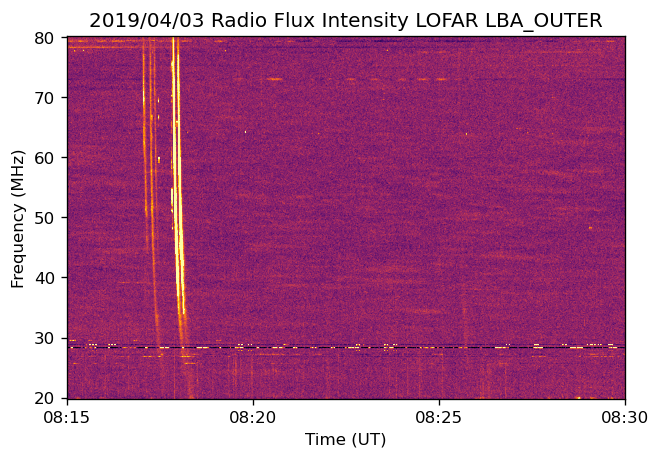

In [3]:
data_fits_new = dyspec-np.tile(np.mean(dyspec,0),(dyspec.shape[0],1))


fig = plt.figure(figsize=(6, 4), dpi=120)
ax = plt.gca()
ax.imshow(data_fits_new.T,aspect='auto',  origin='lower', 
                   vmin=(np.mean(data_fits_new)-2*np.std(data_fits_new)),
                   vmax=(np.mean(data_fits_new)+3*np.std(data_fits_new)),
                   extent=[t_fits[0],t_fits[-1],f_fits[0],f_fits[-1]],cmap='inferno')


ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(hdu[0].header['CONTENT'])


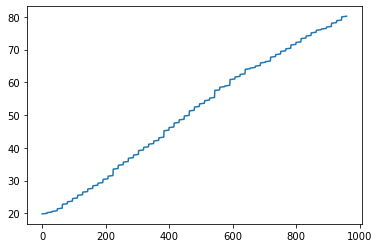

In [5]:
plt.plot(f_fits) # frequency not continous